In [635]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [636]:
# MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
X_train = train_data.drop(['id','yield','Row#'], axis=1)  # Assuming 'yield' is the target column
X_test = test_data.drop(['id', 'Row#'], axis=1)
X_update = train_data.drop(['id','yield','Row#','MaxOfUpperTRange','AverageOfUpperTRange','MaxOfLowerTRange','AverageOfLowerTRange','RainingDays','fruitmass','seeds'], axis=1)
Y_train = train_data['yield']

In [637]:
import numpy as np

def OLS(X, Y):
    X = np.column_stack((np.ones(X.shape[0]), X))  # Add a column of ones for the intercept term
    X_T_X_inv = np.linalg.inv(X.T.dot(X))
    beta = X_T_X_inv.dot(X.T).dot(Y)
    return beta

In [638]:
def predict(X, beta):
    X = np.column_stack((np.ones(X.shape[0]), X))  # Add intercept term
    return X.dot(beta)

In [639]:
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [640]:
beta = OLS(X_train.values, Y_train.values)
train_predictions = predict(X_train.values, beta)
mae_train = MAE(Y_train.values, train_predictions)
print(f"Train MAE: {mae_train}")


Train MAE: 269.59383443738795


In [641]:
test_predictions = predict(X_test.values, beta)
test_id = test_data['id'].values

# Save test predictions to CSV
test_output = pd.DataFrame({'id': test_id, 'y': test_predictions.flatten()})
test_output.to_csv('3_predictions.csv', index=False)

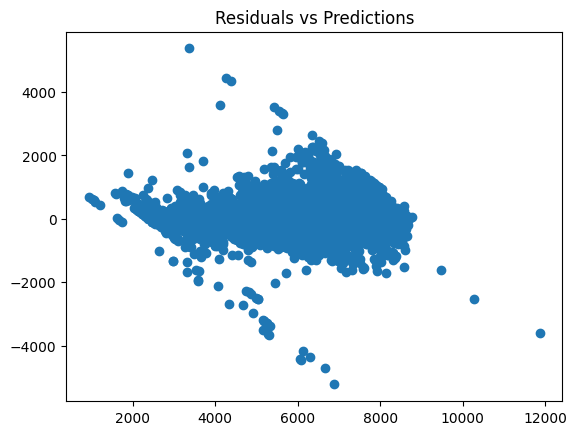

In [642]:
import matplotlib.pyplot as plt

residuals = Y_train.values - train_predictions
plt.scatter(train_predictions, residuals)
plt.title("Residuals vs Predictions")
plt.show()

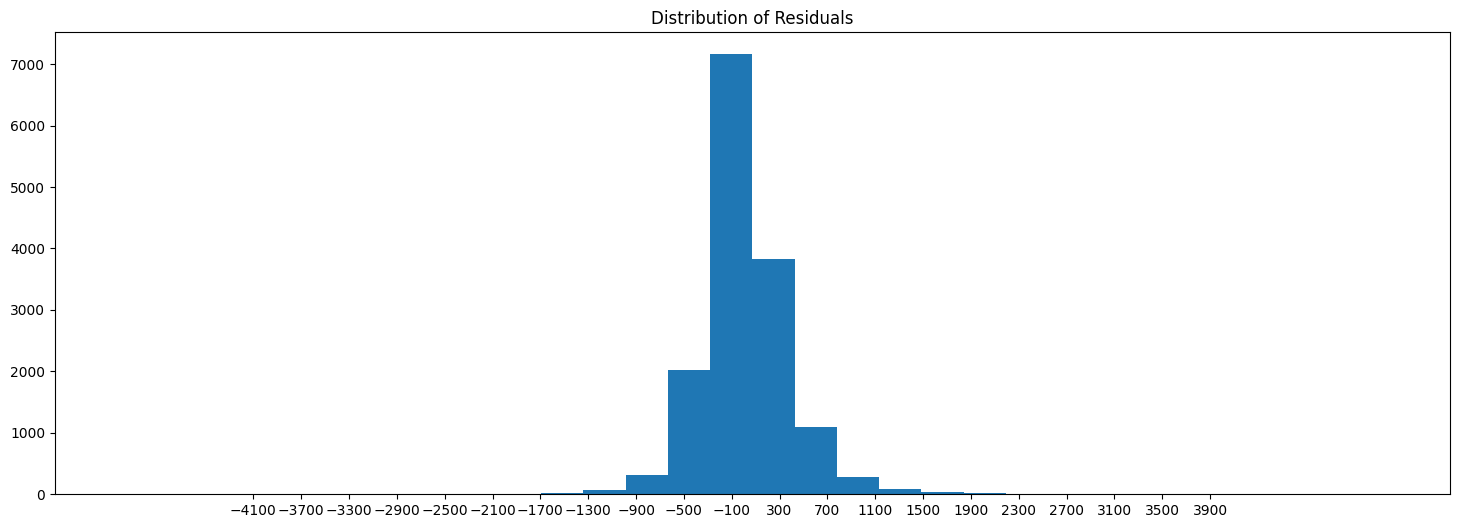

In [643]:
plt.figure(figsize=(18,6))
plt.hist(residuals, bins=30)
plt.title("Distribution of Residuals")
plt.xticks(range(-4100,4300,400))
plt.show()

<Axes: >

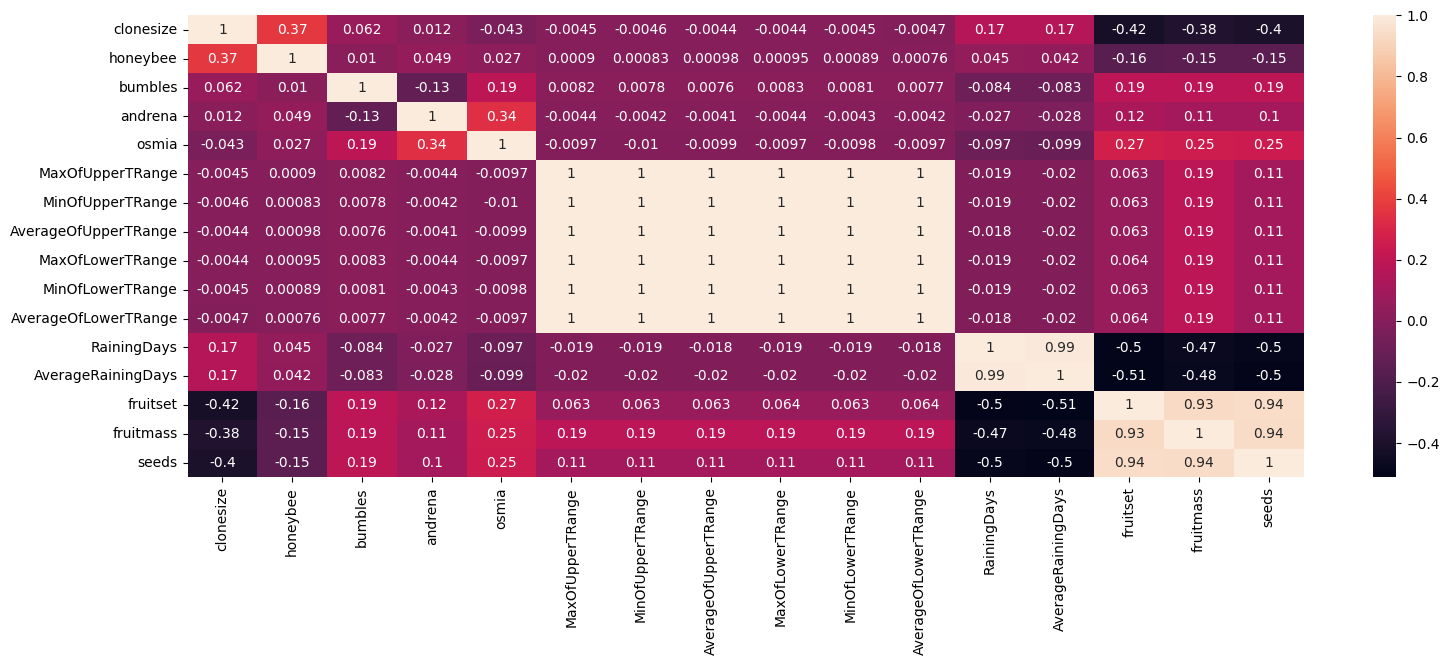

In [644]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(X_test.corr(), annot=True)

<Axes: >

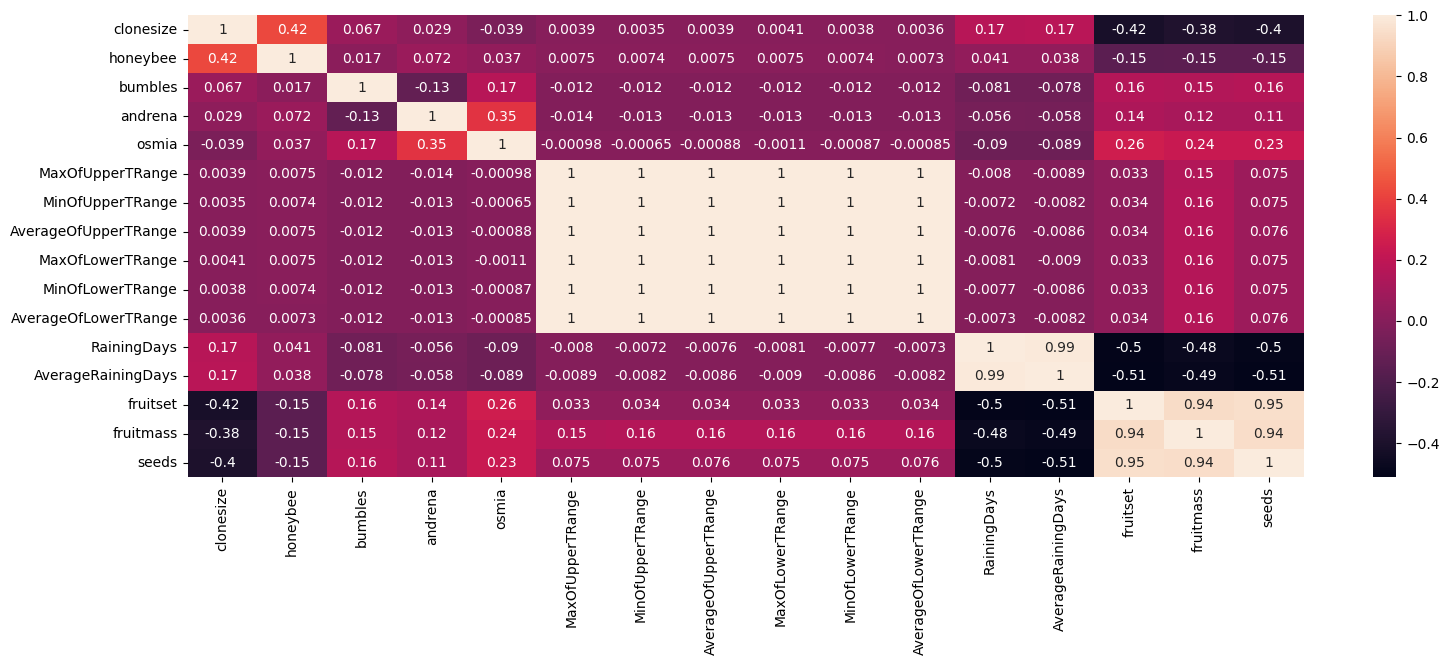

In [645]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(X_train.corr(), annot=True)

Anderson-Darling test statistic: inf
p-value from the Anderson-Darling test: 0.0


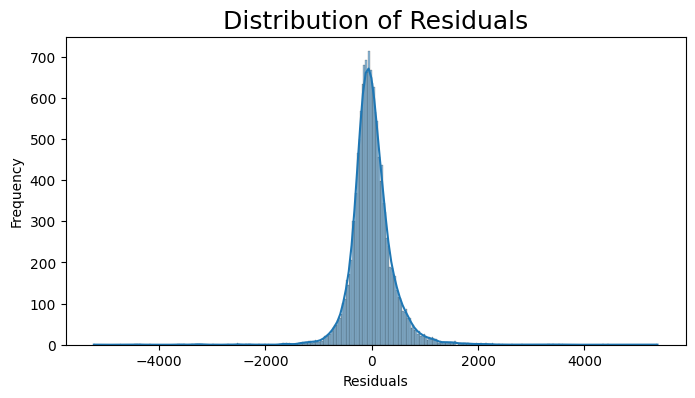

Residuals are not normally distributed (p-value < 0.05)


In [646]:
import numpy as np
from statsmodels.stats.diagnostic import normal_ad
import seaborn as sns
import matplotlib.pyplot as plt

# Performing the Anderson-Darling test on the residuals
ad_stat, p_value = normal_ad(residuals)

print(f'Anderson-Darling test statistic: {ad_stat}')
print(f'p-value from the Anderson-Darling test: {p_value}')

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.histplot(residuals, kde=True)  # Using sns.histplot
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed (p-value < 0.05)')
else:
    print('Residuals are normally distributed (p-value >= 0.05)')

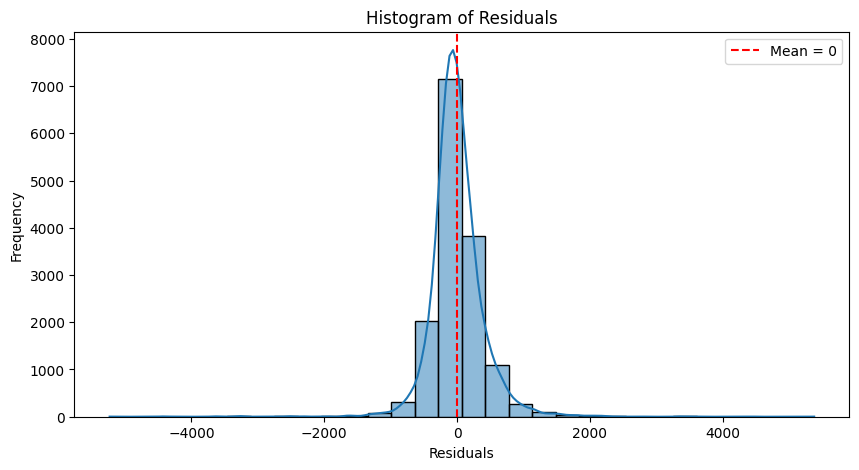

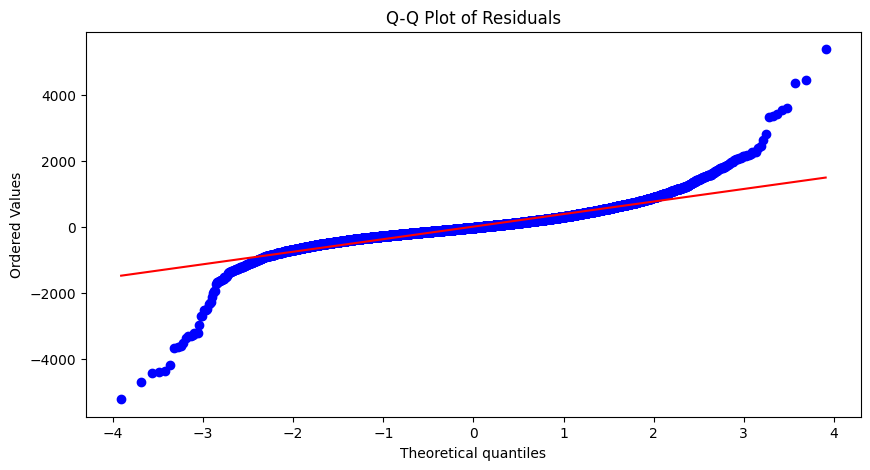

In [647]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='Mean = 0')
plt.legend()
plt.show()

# Q-Q Plot
plt.figure(figsize=(10, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()
